In [39]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [40]:
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')



/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_77393/1077967570.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


In [41]:
data.head
data.shape
data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Direction', 'Distance',
       'Distance Unit', 'Road Grade', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'First Harmful Event',
       'Second Harmful Event', 'Junction', 'Intersection Type',
       'Road Alignment', 'Road Condition', 'Road Division', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [42]:
colonnes = ['Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

In [43]:
df.shape
df.columns

Index(['Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Collision Type',
       'Related Non-Motorist', 'At Fault', 'First Harmful Event',
       'Second Harmful Event', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [44]:
df.head
df.describe()

,Latitude,Longitude
count,101276.000000,101276.000000
mean,39.084404,-77.114360
std,0.072776,0.099519
min,37.720000,-79.486000
25%,39.025901,-77.191810
50%,39.076073,-77.107618
75%,39.140797,-77.040599
max,39.990414,-75.527708


In [45]:
df = df.dropna(axis=0)

In [46]:
df.shape

(91, 20)

In [47]:
df.describe()
df.columns

Index(['Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
       'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Collision Type',
       'Related Non-Motorist', 'At Fault', 'First Harmful Event',
       'Second Harmful Event', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_77393/3598701326.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


<Axes: xlabel='Year'>

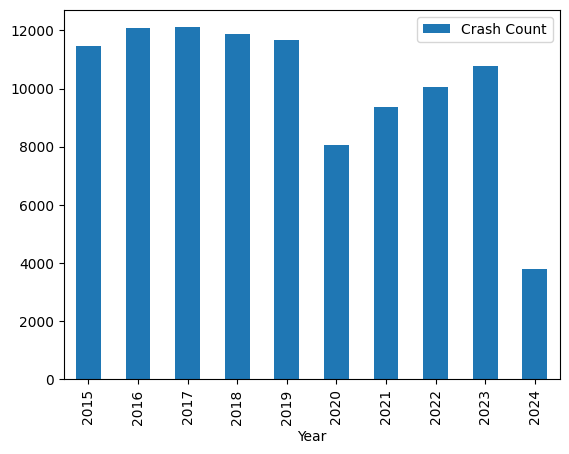

In [48]:
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
df = data

# création d'un nouveau jeu de données avec la colonne date qui regroupe les années de Crash Date/Time et qui additionne le nombre de crash par année
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df_yearly_crashes = df.groupby('Year').size().reset_index(name='Crash Count')
df_yearly_crashes.head()

#nombre totale d'accidents par année
df_yearly_crashes.plot(x='Year', y='Crash Count', kind='bar')


<Axes: ylabel='count'>

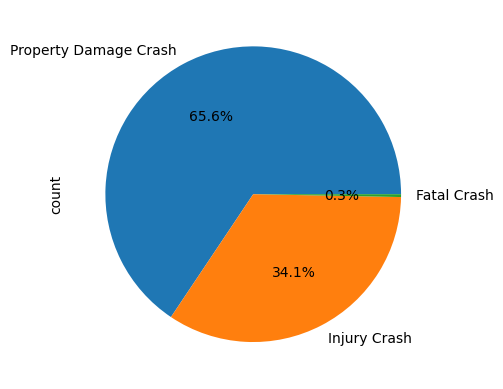

In [49]:
#Pourcentage de chaque type de crash
df['ACRS Report Type'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Hour'>

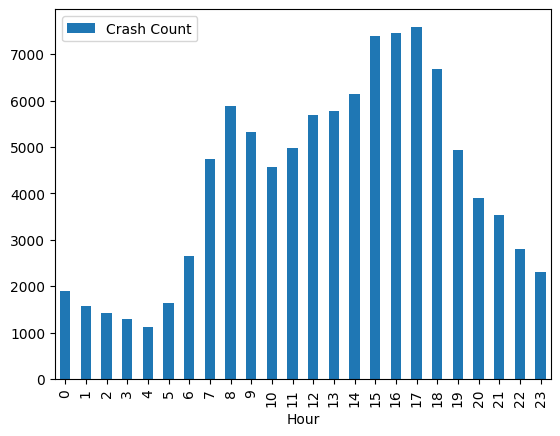

In [50]:
#Histogramme du nombre de crash par heure et par année

df['Hour'] = pd.to_datetime(df['Crash Date/Time']).dt.hour
df_hourly_crashes = df.groupby('Hour').size().reset_index(name='Crash Count')
df_hourly_crashes.plot(x='Hour', y='Crash Count', kind='bar')



<Axes: xlabel='Month'>

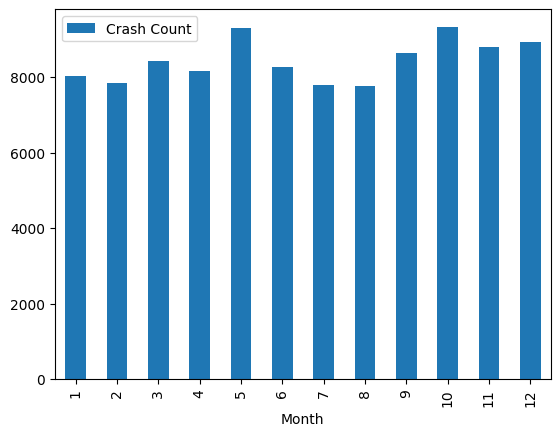

In [51]:
#Histogramme du nombre de crash par mois et par année
df['Month'] = pd.to_datetime(df['Crash Date/Time']).dt.month
df_monthly_crashes = df.groupby('Month').size().reset_index(name='Crash Count')
df_monthly_crashes.plot(x='Month', y='Crash Count', kind='bar')


In [52]:

data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
colonnes = ['Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

df.head()


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_77393/351096595.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Collision Type,Related Non-Motorist,At Fault,First Harmful Event,Second Harmful Event,Latitude,Longitude,Location
0,03/04/2019 08:41:00 AM,No,Maryland (State),West,NaN,2,CLOUDY,DRY,DAYLIGHT,NaN,NONE DETECTED,NaN,SAME DIR REAR END,NaN,DRIVER,OTHER VEHICLE,NaN,39.113113,-77.057592,"(39.11311333, -77.05759167)"
1,06/04/2016 07:14:00 PM,Yes,County,East,NaN,1,CLEAR,DRY,DAYLIGHT,NaN,UNKNOWN,NaN,OTHER,NaN,DRIVER,PARKED VEHICLE,OTHER VEHICLE,38.982443,-77.079235,"(38.98244333, -77.079235)"
2,08/18/2015 11:00:00 PM,No,County,South,NaN,2,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,NaN,OPPOSITE DIRECTION SIDESWIPE,NaN,UNKNOWN,PARKED VEHICLE,NaN,39.189845,-77.230325,"(39.189845, -77.230325)"
3,08/24/2023 07:46:00 AM,No,Maryland (State),West,NaN,4,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,SINGLE VEHICLE,NaN,DRIVER,NaN,NaN,39.041698,-77.050125,"(39.04169833, -77.050125)"
4,08/12/2023 04:28:00 PM,Yes,NaN,South,NaN,3,NaN,DRY,NaN,NO CONTROLS,NaN,NaN,SAME DIRECTION SIDESWIPE,NaN,DRIVER,OTHER VEHICLE,OTHER VEHICLE,39.084720,-77.148200,"(39.08472, -77.1482)"


In [53]:
#création d'une map avec les coordonnées des accidents et leur type de collision
import folium
from folium import plugins

#mise sur la map des points de coordonnées des accidents
map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)


for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)
    

map

In [64]:
#création d'un dataframe avec les coordonnées des accidents et leur type de collision sur l'année 2019 uniquement
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df_2019 = df[df['Year'] == 2023]
#création d'un dataframe comprenant que les accidents de type fatal crash sur l'année 2019
df_fatal_crash_2019 = df_2019[df_2019['ACRS Report Type'] == 'Fatal Crash']

map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

for i in range(0, min(1000, len(df_2019))):
    if i >= len(df_2019):
        break
    folium.Marker([df_2019.iloc[i]['Latitude'], df_2019.iloc[i]['Longitude']], popup=df_2019.iloc[i]['Collision Type']).add_to(map)

    
map


#affichadu dataframe avec les coordonnées des accidents et leur type de collision sur l'année 2019 uniquement
df_2019.head()
df_2019.shape


#création d'un dataframe avec les coordonnées des accidents et leur type de collision sur l'année 2019 uniqueme

KeyError: 'ACRS Report Type'

In [55]:
# map des accident par type de collision et sur l'année 2019
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2019]



map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)

map

In [56]:
#création d'une heatmap avec les coordonnées des accidents
from folium.plugins import HeatMap

map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

heat_df = df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map)

map

In [57]:
#création d'une heatmap avec les coordonnées des accidents sur l'année 2019 uniquement
map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

heat_df = df_2019[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map)

map


In [58]:
#récupération des données du CSV
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')

#création d'un dataframe avec les colonnes qui nous intéressent
colonnes = ['Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]


#création d'un jeux de données sur l'année 2020 uniquement


df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2023]

df.head()
df.shape


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_77393/1173646140.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_77393/1173646140.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year


(10773, 21)